In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/Shareddrives"

Mounted at /content/drive
'Capstone I_Saks Omni Channel'	'Data Engineering Final Project'   ML_Final


In [ ]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
general_path = '/content/drive/Shareddrives/ML_Final/Music_Data/Music_Genre_Data'

print(list(os.listdir(f'{general_path}/genres_original/')))

['.DS_Store', 'pop', 'hiphop', 'classical', 'blues', 'country', 'reggae', 'rock', 'disco', 'metal', 'jazz']


In [ ]:
music30 = pd.read_csv('/content/drive/Shareddrives/ML_Final/Music_Data/Music_Genre_Data/features_30_sec.csv')
music30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
music30.shape

(1000, 60)

In [ ]:
print(music30.columns.values)

['filename' 'length' 'chroma_stft_mean' 'chroma_stft_var' 'rms_mean'
 'rms_var' 'spectral_centroid_mean' 'spectral_centroid_var'
 'spectral_bandwidth_mean' 'spectral_bandwidth_var' 'rolloff_mean'
 'rolloff_var' 'zero_crossing_rate_mean' 'zero_crossing_rate_var'
 'harmony_mean' 'harmony_var' 'perceptr_mean' 'perceptr_var' 'tempo'
 'mfcc1_mean' 'mfcc1_var' 'mfcc2_mean' 'mfcc2_var' 'mfcc3_mean'
 'mfcc3_var' 'mfcc4_mean' 'mfcc4_var' 'mfcc5_mean' 'mfcc5_var'
 'mfcc6_mean' 'mfcc6_var' 'mfcc7_mean' 'mfcc7_var' 'mfcc8_mean'
 'mfcc8_var' 'mfcc9_mean' 'mfcc9_var' 'mfcc10_mean' 'mfcc10_var'
 'mfcc11_mean' 'mfcc11_var' 'mfcc12_mean' 'mfcc12_var' 'mfcc13_mean'
 'mfcc13_var' 'mfcc14_mean' 'mfcc14_var' 'mfcc15_mean' 'mfcc15_var'
 'mfcc16_mean' 'mfcc16_var' 'mfcc17_mean' 'mfcc17_var' 'mfcc18_mean'
 'mfcc18_var' 'mfcc19_mean' 'mfcc19_var' 'mfcc20_mean' 'mfcc20_var'
 'label']


# Understanding and Exploring Audio data and its characteristics(CSV File)
## (Sample Audio Randomly Selected: reggae.00036.wav)

In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


**Sound** is the sequence of vibrations in varying pressure strengths (y, which is the length in music30 dataset)

The **Sample Rate** (**sr**) is the number of samples of audio carried per second, measured in Hz or kHz



## Visualization

### Sample Sound Waves(2D Representation)

In [ ]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


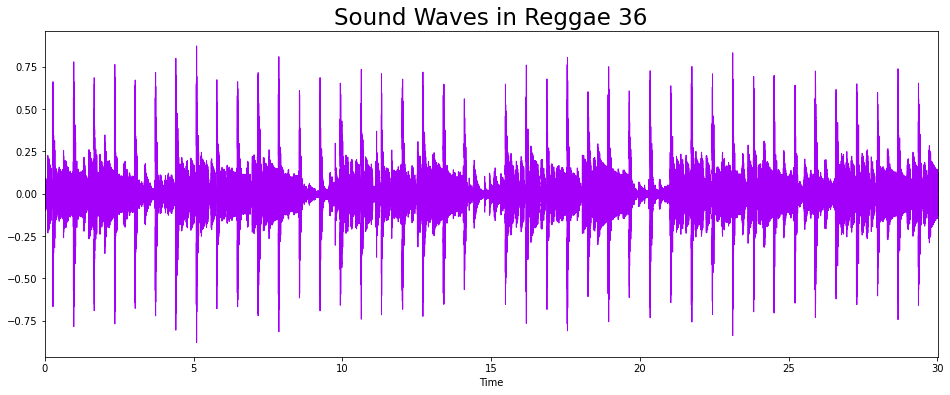

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

## Fourier Transform

### Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies

### Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes

Shape of D object: (1025, 1293)


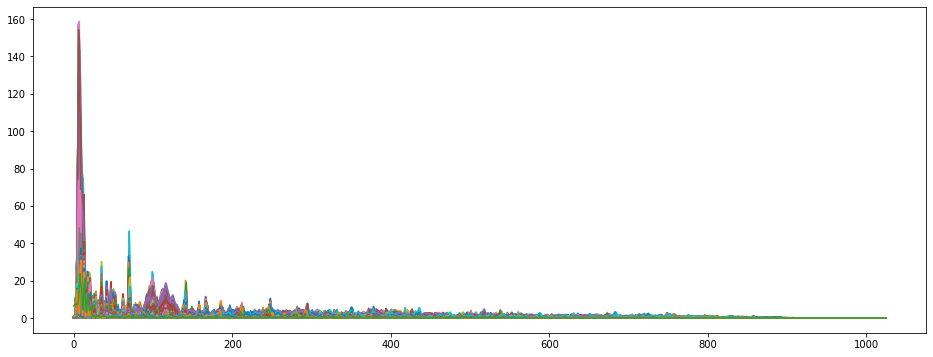

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (16, 6))
plt.plot(D);

## The Spectrogram
### A visual representation of the spectrum of frequencies of a signal as it varies with time. Also called sonographs, voiceprints, or voicegrams when applied to an audio signal. 


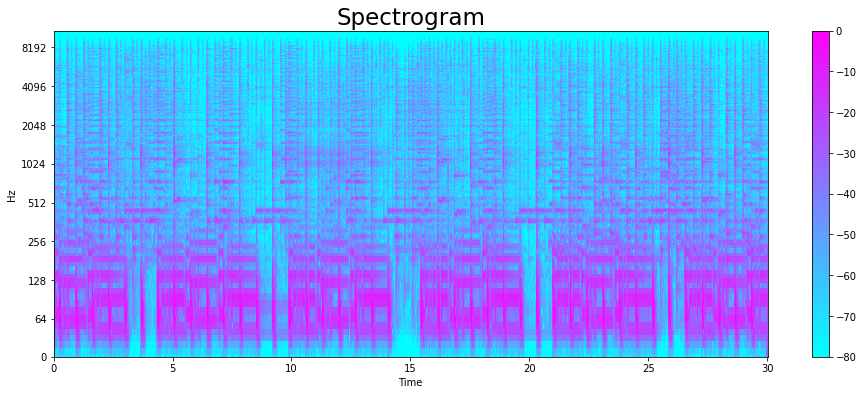

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();
plt.title("Spectrogram", fontsize = 23);

## Mel Spectrogram

### The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

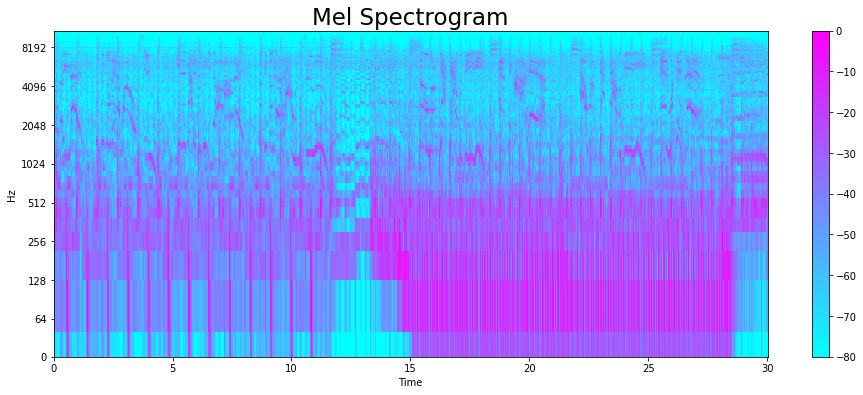

In [ ]:
## Metal Mel Spectrogram
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Mel Spectrogram", fontsize = 23);

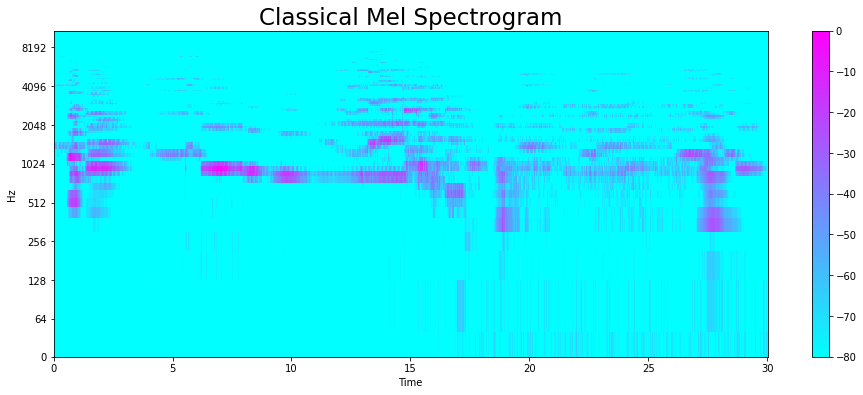

In [ ]:
## Classical Mel Spectrogram

y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);


# Audio Features

## Chroma Frequencies
(chroma_stft_mean, chroma_stft_var)

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


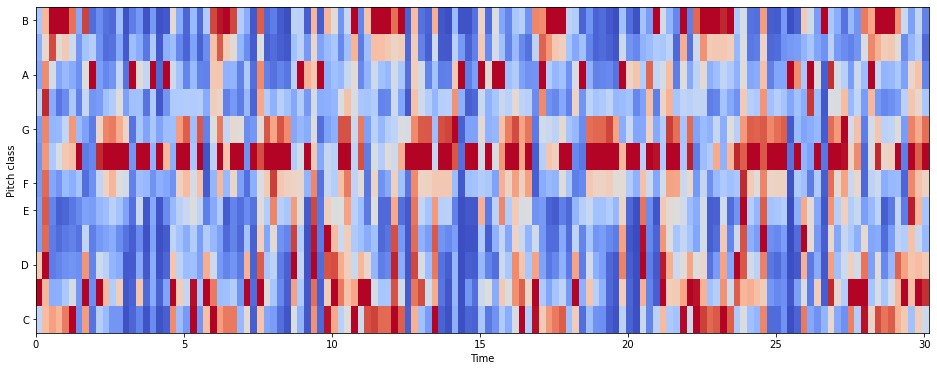

In [ ]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## RMS 
Root mean square or simply RMS watts refers to continuous power handling of a speaker or a subwoofer or how much continuous power an amplifier can output

## Spectral Centroid
It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1817.93364736 1953.08392985 2038.8113414  ...  766.50416352 1019.33192639
 1081.69931747] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


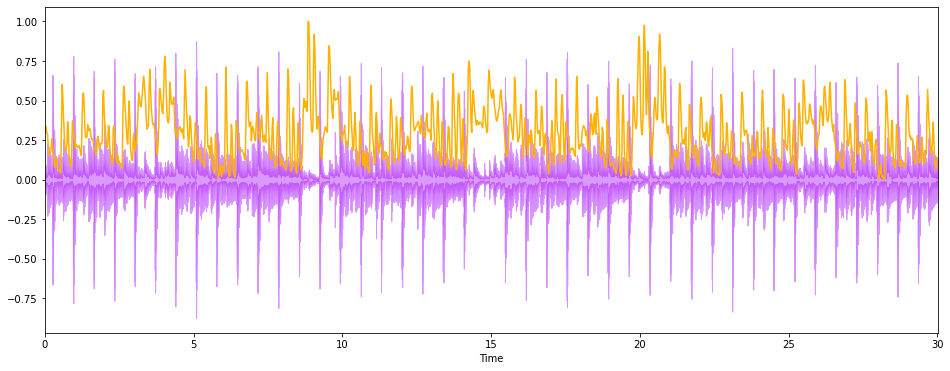

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

## Spectral Bandwidth 
It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value. It is a measure of the extent of the Spectrum For a Light Source typical spectral widths are 20 to 60 nm for a LED and 2 to 5 nm for a Laser diode.

In [ ]:
# Calculate the Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(audio_file, sr=sr)[0]

# Shape is a vector
print('Bandwidth:', spectral_bandwidth, '\n')
print('Shape of Spectral Bandwidth:', spectral_bandwidth.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_bandwidth))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Bandwidth: [2078.14731469 2081.83486347 2057.16463083 ... 1465.69058604 1894.23755831
 2078.63400561] 

Shape of Spectral Bandwidth: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


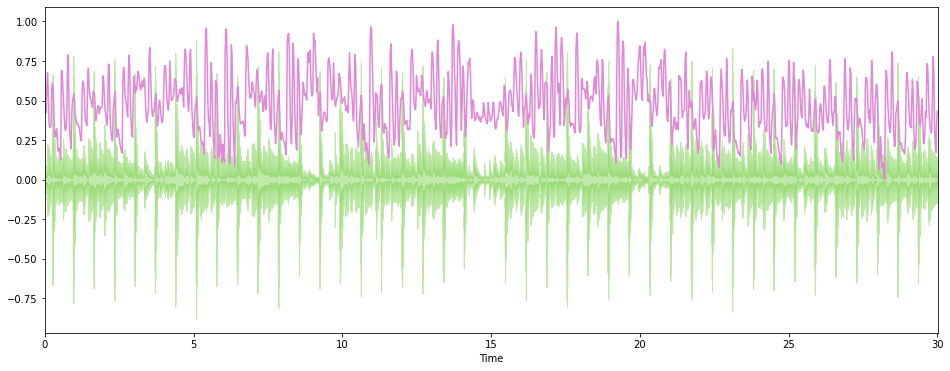

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#64c92f');
plt.plot(t, normalize(spectral_bandwidth), color='#e387d9');

# Spectral Rolloff
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy

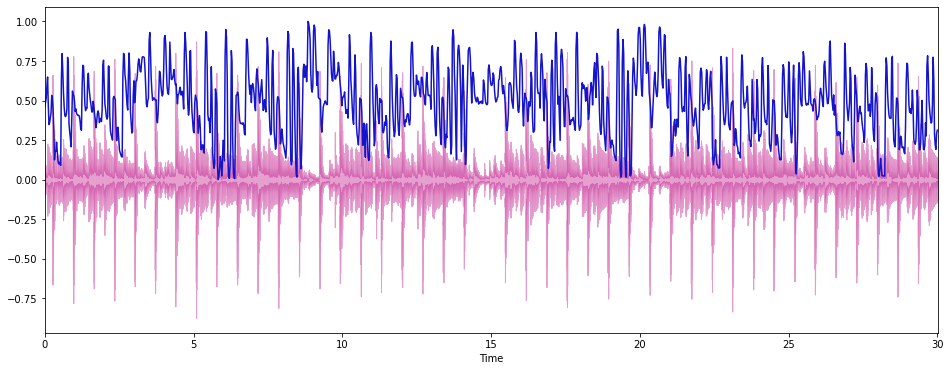

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#bf1388');
plt.plot(t, normalize(spectral_rolloff), color='#1414cc');


# Zero Crossing Rate
## The rate at which the signal changes from positive to negative or back.

In [ ]:
# Total zero_crossings in reggae.00036.wav
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


# Harmonics and Perceptrual

Harmonics are characteristichs that human ears can't distinguish (represents the sound color)

Perceptrual understands shock wave, represents the sound rhythm and emotion

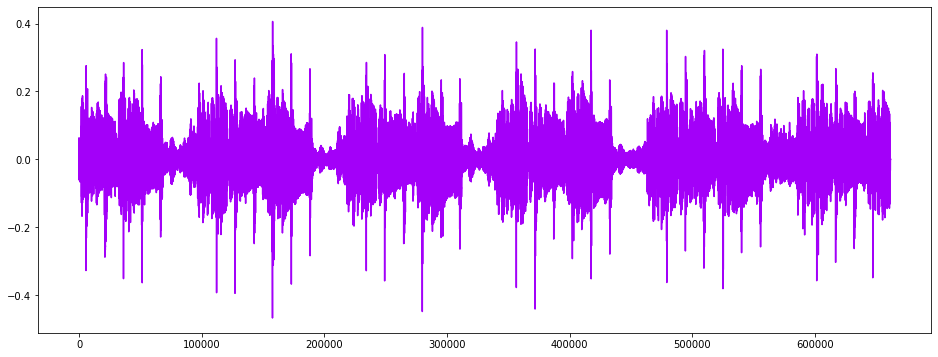

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');

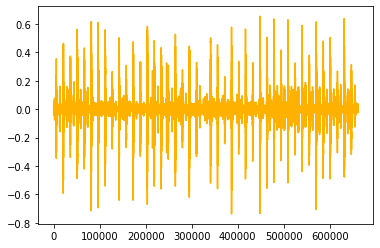

In [ ]:
plt.plot(y_perc, color = '#FFB100');

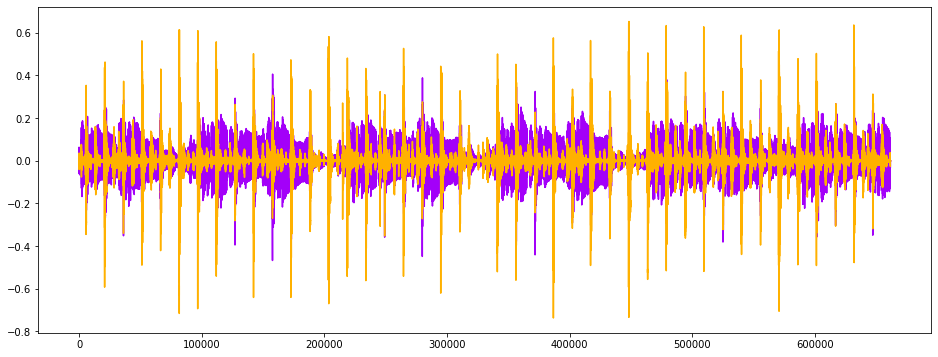

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

## Tempo BMP (beats per minute)
Tempo is a dynamic programming beat tracker.

In [ ]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

107.666015625

# Mel-Frequency Cepstral Coefficients(MFCC)

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC

mfccs shape: (20, 1293)


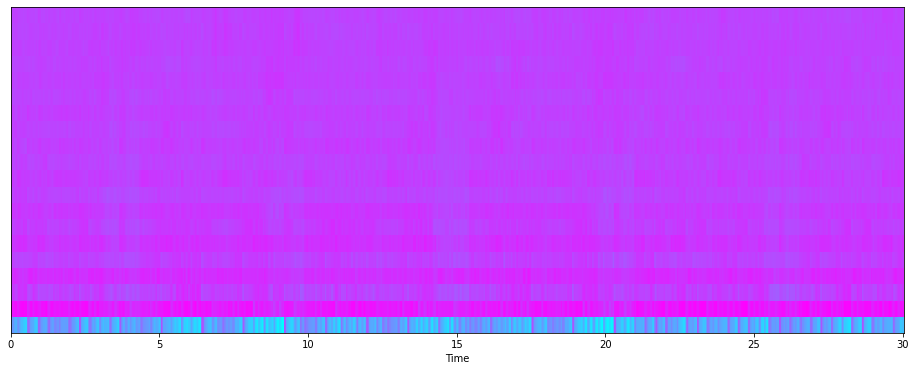

In [ ]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Mean: -5.9005373e-10 

Var: 1.0000001


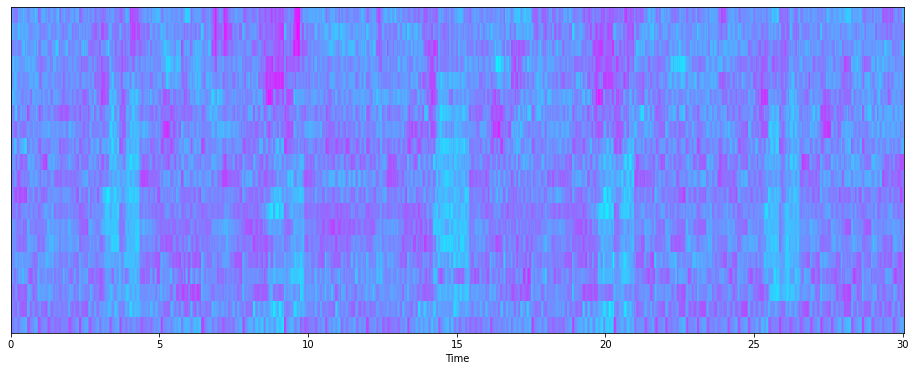

In [ ]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

# EDA

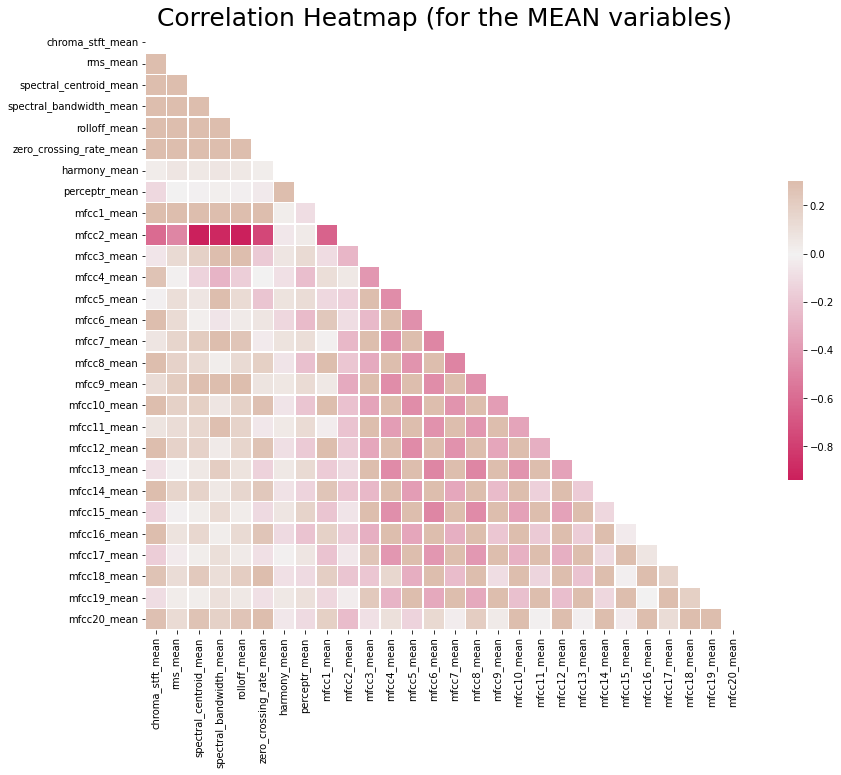

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in music30.columns if 'mean' in col]
corr = music30[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

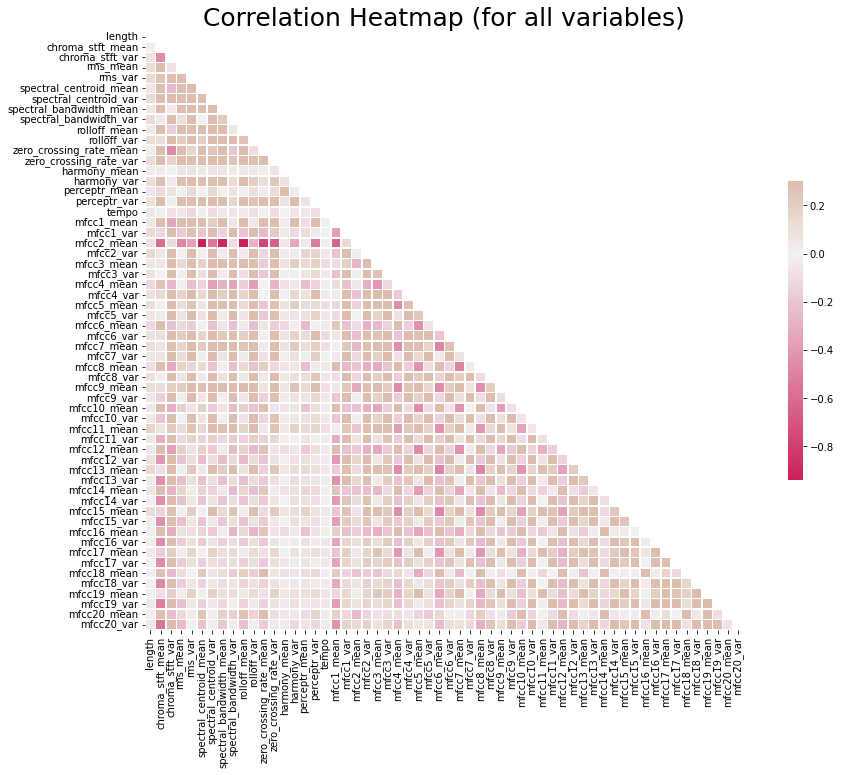

In [ ]:
# Computing the Correlation Matrix
cols = [col for col in music30.columns]
corr = music30[cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for all variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

## Box Plot for Genres Distributions

In [ ]:
data = music30
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


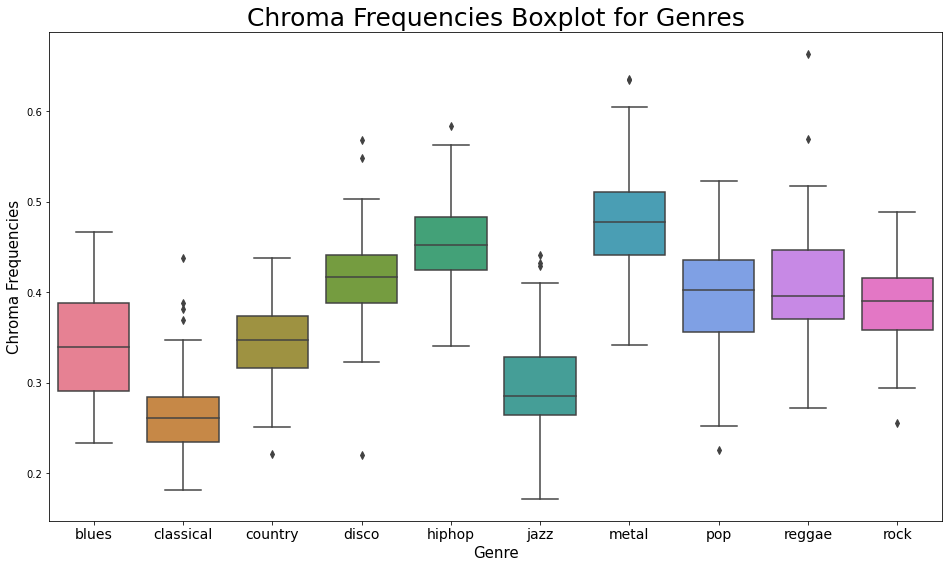

In [ ]:
## Chroma Frequencies Boxplot
x = music30[["label", "chroma_stft_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "chroma_stft_mean", data = x, palette = 'husl');

plt.title('Chroma Frequencies Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Chroma Frequencies", fontsize = 15)
plt.savefig("Chroma Frequencies Boxplot.jpg")

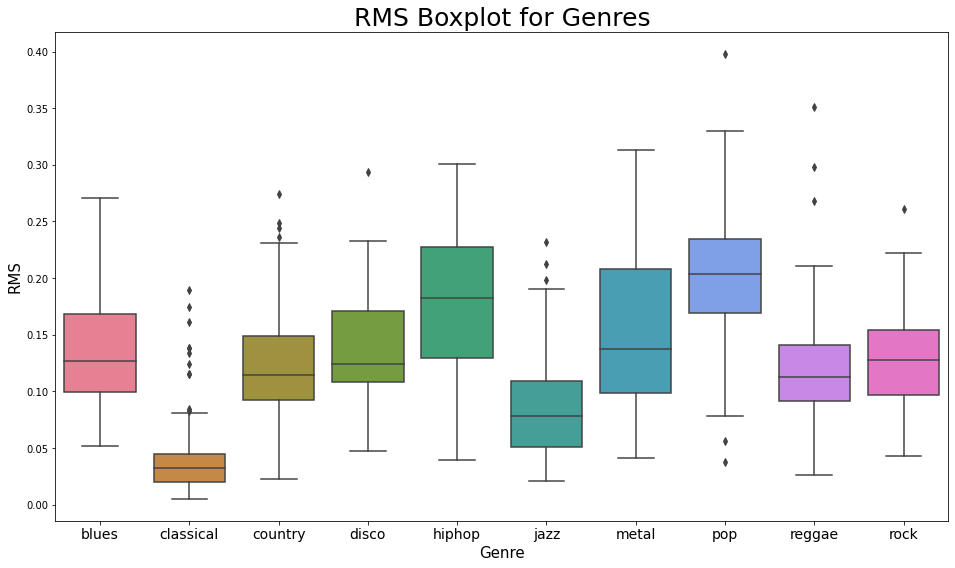

In [ ]:

x = music30[["label", "rms_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "rms_mean", data = x, palette = 'husl');

plt.title('RMS Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("RMS", fontsize = 15)
plt.savefig("RMS Boxplot.jpg")

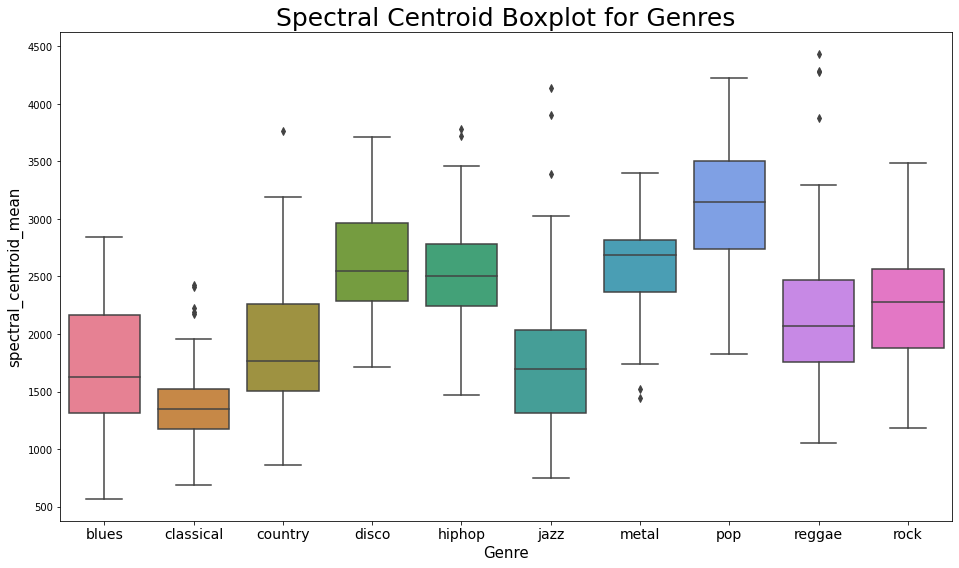

In [ ]:
x = music30[["label", "spectral_centroid_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "spectral_centroid_mean", data = x, palette = 'husl');

plt.title('Spectral Centroid Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("spectral_centroid_mean", fontsize = 15)
plt.savefig("Spectral Centroid Boxplot.jpg")

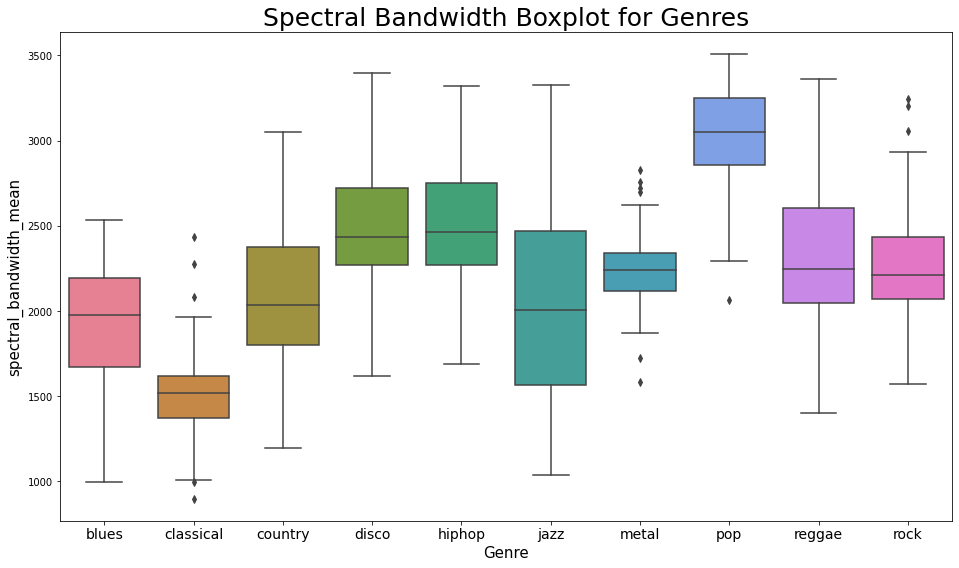

In [ ]:
x = music30[["label", "spectral_bandwidth_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "spectral_bandwidth_mean", data = x, palette = 'husl');

plt.title('Spectral Bandwidth Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("spectral_bandwidth_mean", fontsize = 15)
plt.savefig("Spectral Bandwidth Boxplot.jpg")

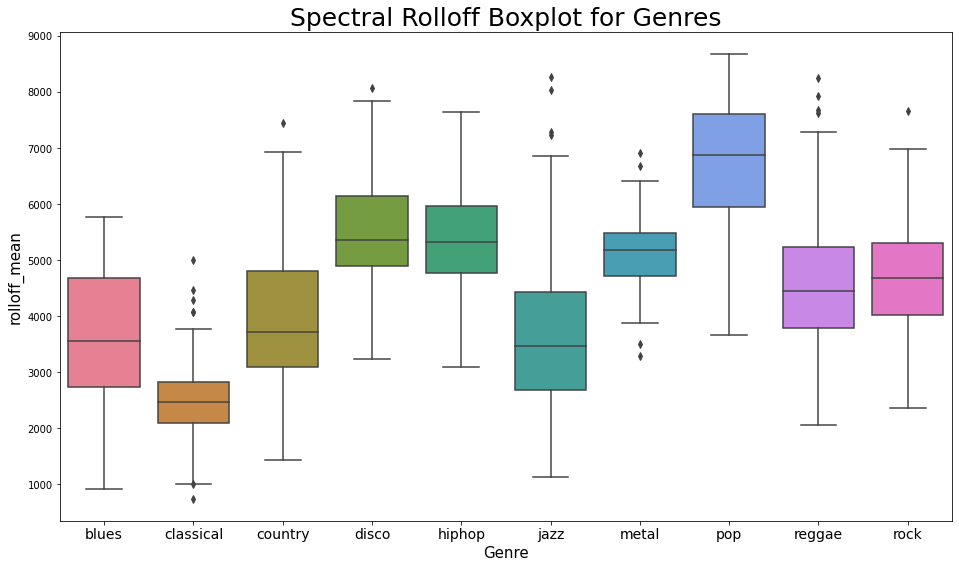

In [ ]:
x = music30[["label", "rolloff_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "rolloff_mean", data = x, palette = 'husl');

plt.title('Spectral Rolloff Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("rolloff_mean", fontsize = 15)
plt.savefig("Spectral Rolloff Boxplot.jpg")

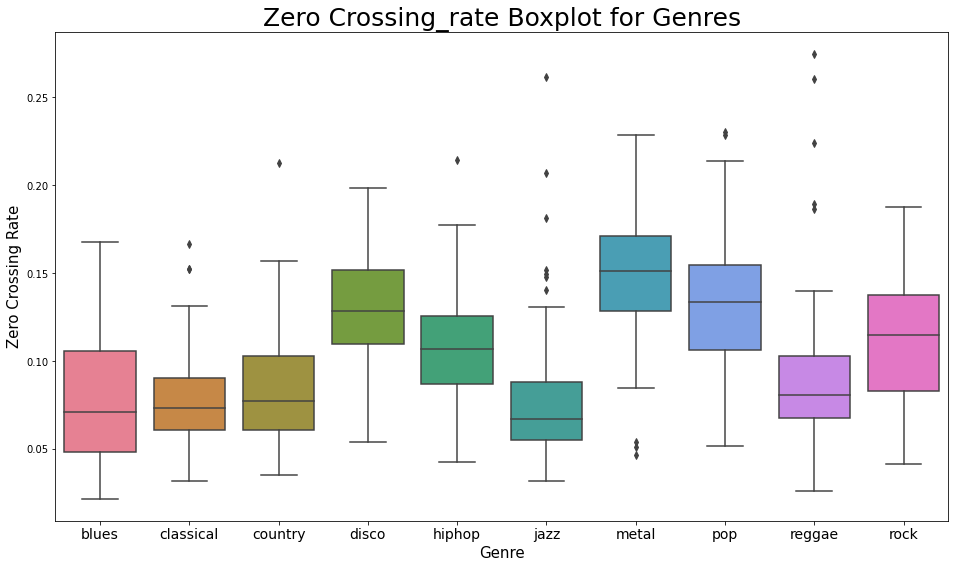

In [ ]:
x = music30[["label", "zero_crossing_rate_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "zero_crossing_rate_mean", data = x, palette = 'husl');

plt.title('Zero Crossing_rate Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Zero Crossing Rate", fontsize = 15)
plt.savefig("Zero Crossing Rate Boxplot.jpg")

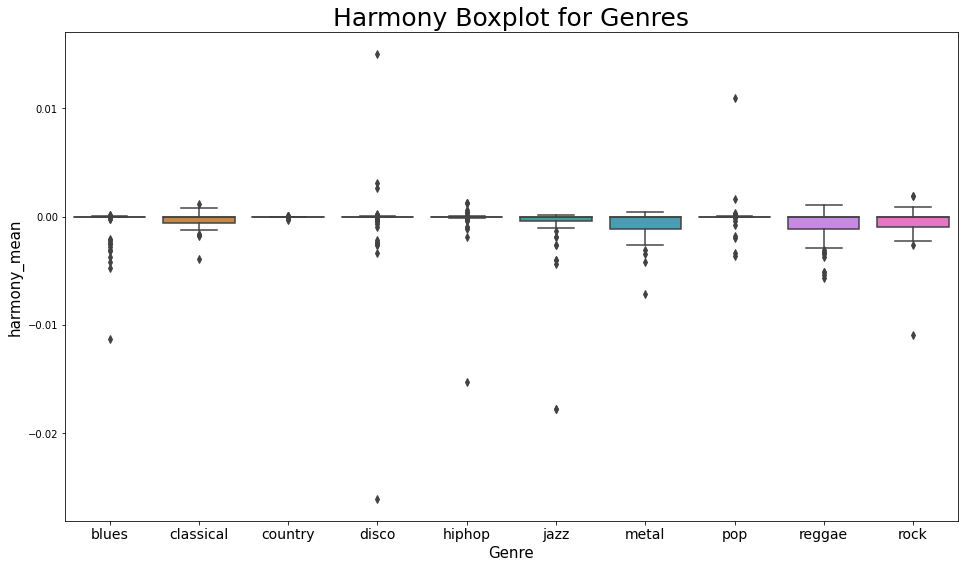

In [ ]:
x = music30[["label", "harmony_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "harmony_mean", data = x, palette = 'husl');

plt.title('Harmony Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("harmony_mean", fontsize = 15)
plt.savefig("Harmony Boxplot.jpg")

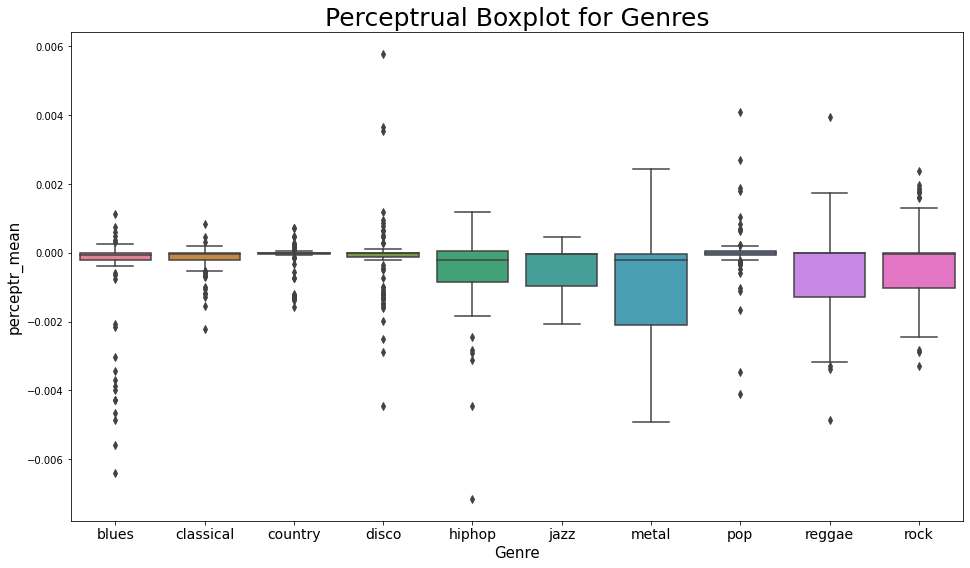

In [ ]:
x = music30[["label", "perceptr_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "perceptr_mean", data = x, palette = 'husl');

plt.title('Perceptrual Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("perceptr_mean", fontsize = 15)
plt.savefig("Perceptrual Boxplot.jpg")

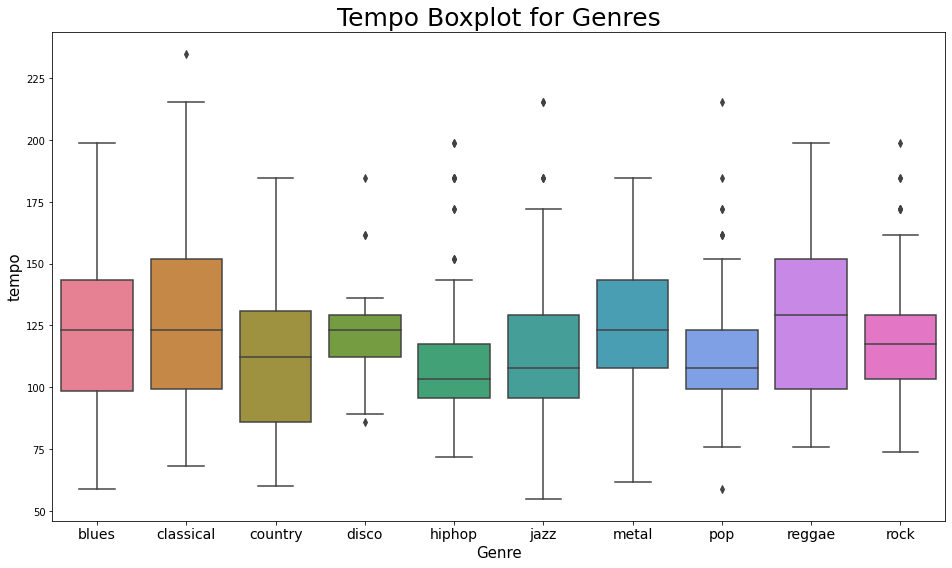

In [ ]:
x = music30[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('Tempo Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("tempo", fontsize = 15)
plt.savefig("TempoBoxplot.jpg")

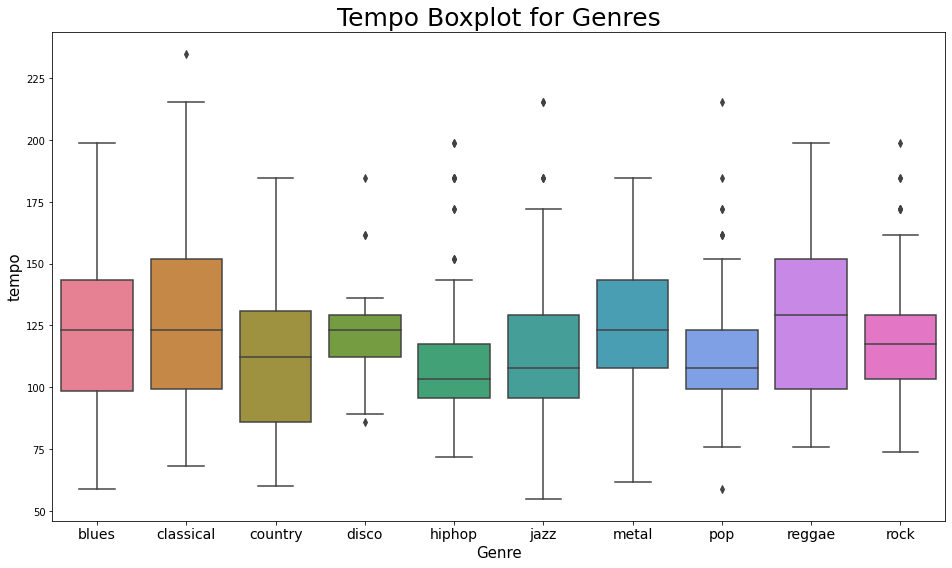

In [ ]:
x = music30[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('Tempo Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("tempo", fontsize = 15)
plt.savefig("Tempo Boxplot.jpg")


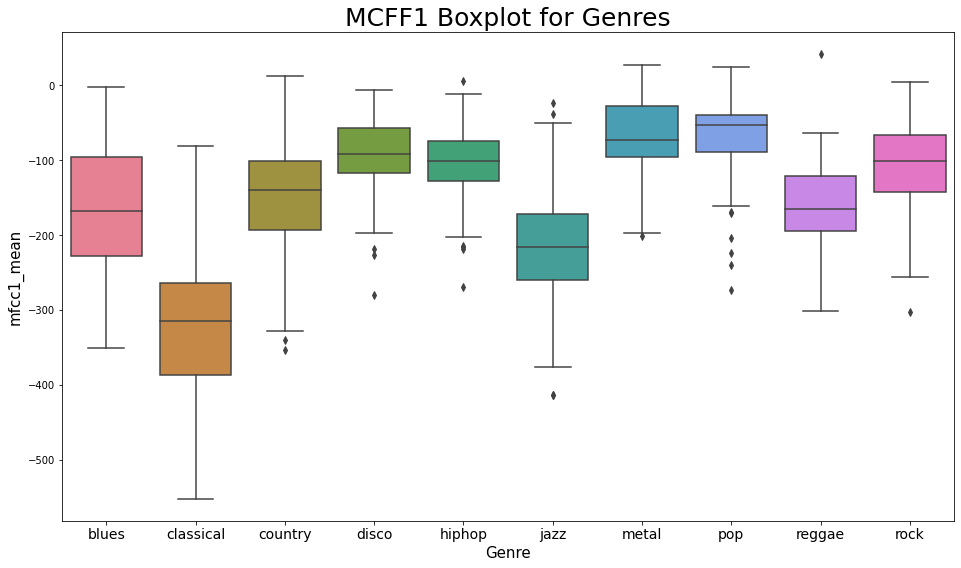

In [ ]:
x = music30[["label", "mfcc1_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc1_mean", data = x, palette = 'husl');

plt.title('MCFF1 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc1_mean", fontsize = 15)
plt.savefig("MCFF1 Boxplot.jpg")

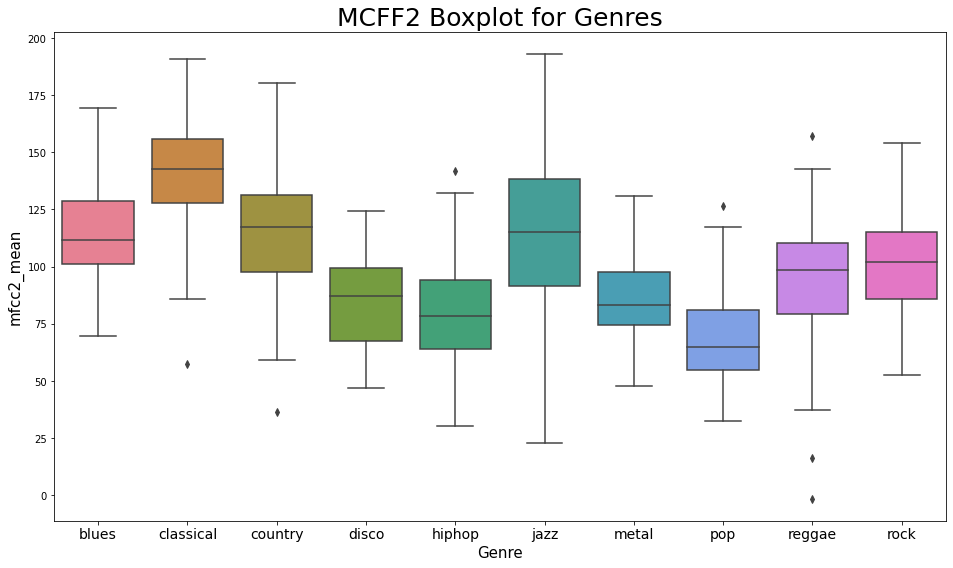

In [ ]:
x = music30[["label", "mfcc2_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc2_mean", data = x, palette = 'husl');

plt.title('MCFF2 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc2_mean", fontsize = 15)
plt.savefig("MCFF2 Boxplot.jpg")

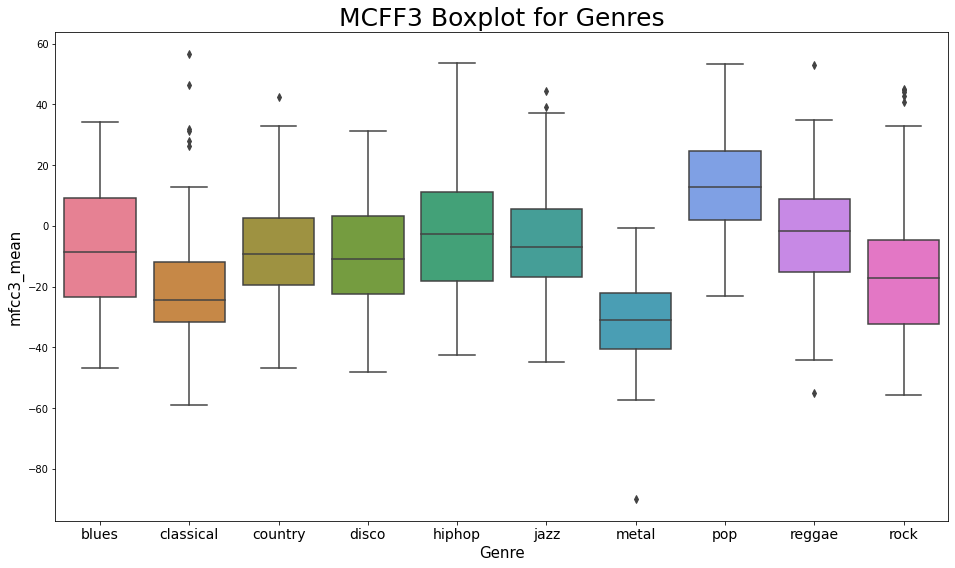

In [ ]:
x = music30[["label", "mfcc3_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc3_mean", data = x, palette = 'husl');

plt.title('MCFF3 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc3_mean", fontsize = 15)
plt.savefig("MCFF3 Boxplot.jpg")

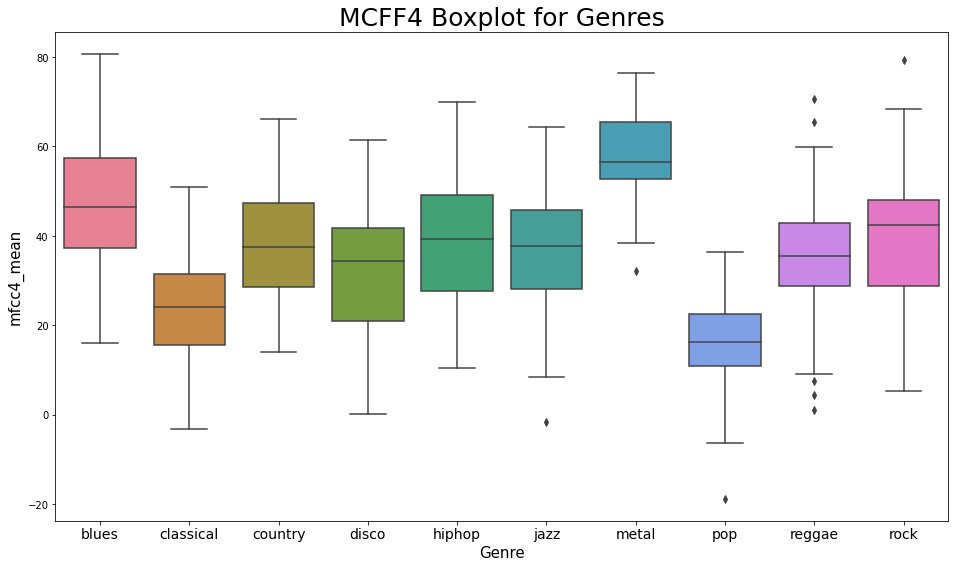

In [ ]:
x = music30[["label", "mfcc4_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc4_mean", data = x, palette = 'husl');

plt.title('MCFF4 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc4_mean", fontsize = 15)
plt.savefig("MCFF4 Boxplot.jpg")

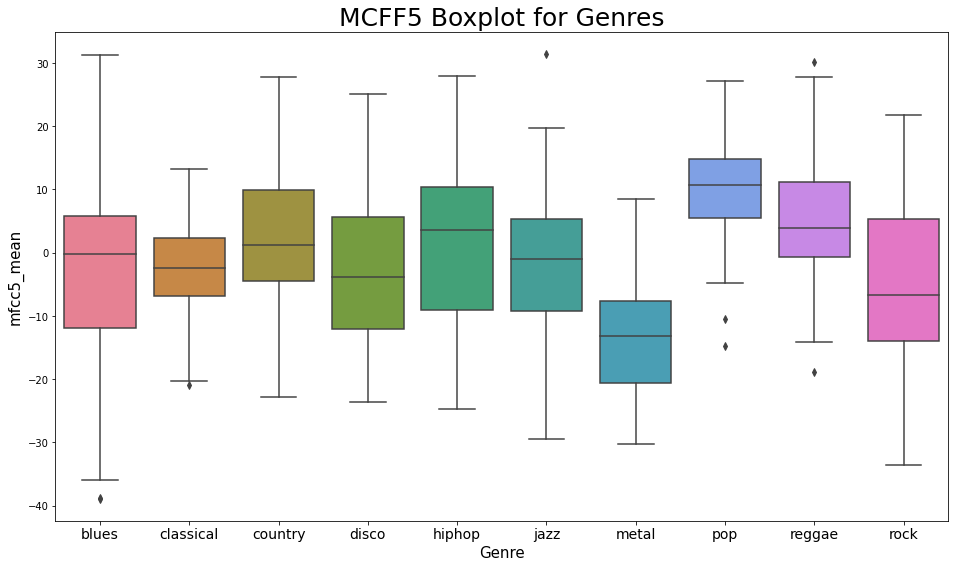

In [ ]:
x = music30[["label", "mfcc5_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc5_mean", data = x, palette = 'husl');

plt.title('MCFF5 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc5_mean", fontsize = 15)
plt.savefig("MCFF5 Boxplot.jpg")

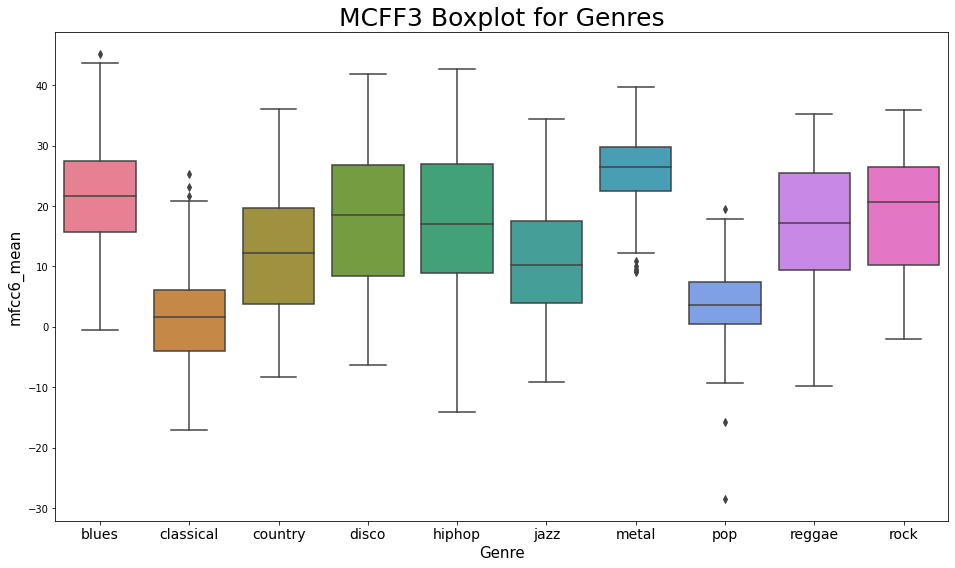

In [ ]:
x = music30[["label", "mfcc6_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc6_mean", data = x, palette = 'husl');

plt.title('MCFF3 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc6_mean", fontsize = 15)
plt.savefig("MCFF6 Boxplot.jpg")

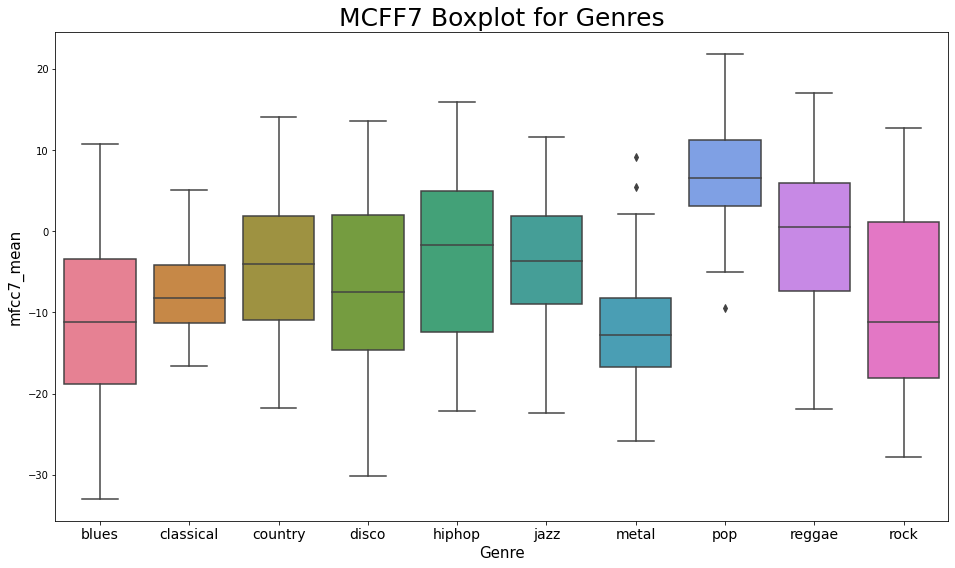

In [ ]:
x = music30[["label", "mfcc7_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc7_mean", data = x, palette = 'husl');

plt.title('MCFF7 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc7_mean", fontsize = 15)
plt.savefig("MCFF7 Boxplot.jpg")

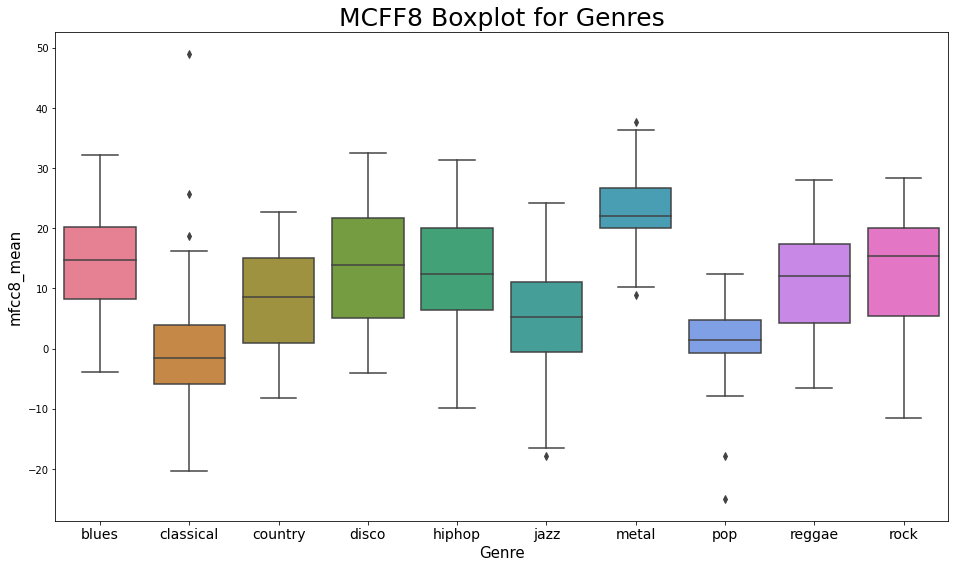

In [ ]:
x = music30[["label", "mfcc8_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc8_mean", data = x, palette = 'husl');

plt.title('MCFF8 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc8_mean", fontsize = 15)
plt.savefig("MCFF8 Boxplot.jpg")

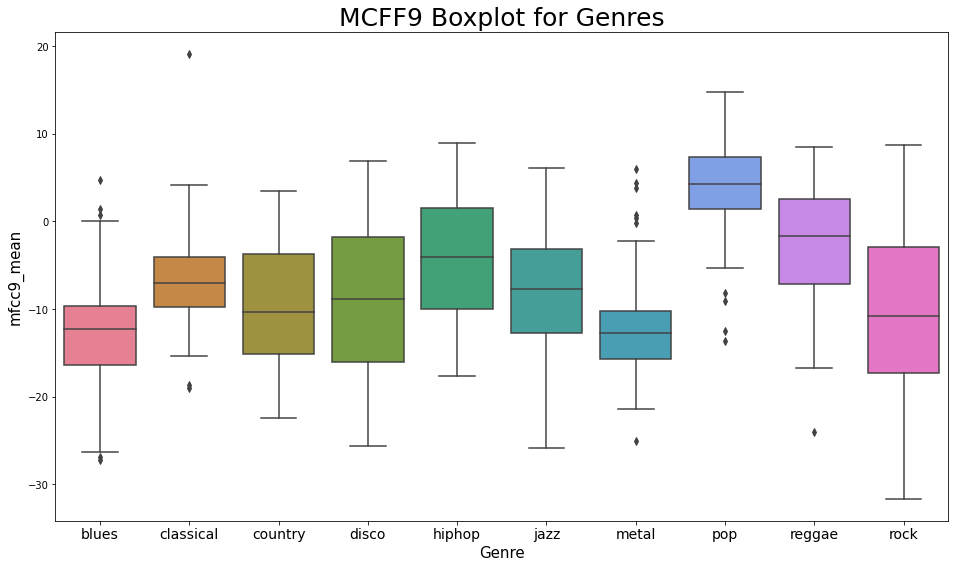

In [ ]:
x = music30[["label", "mfcc9_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc9_mean", data = x, palette = 'husl');

plt.title('MCFF9 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc9_mean", fontsize = 15)
plt.savefig("MCFF9 Boxplot.jpg")

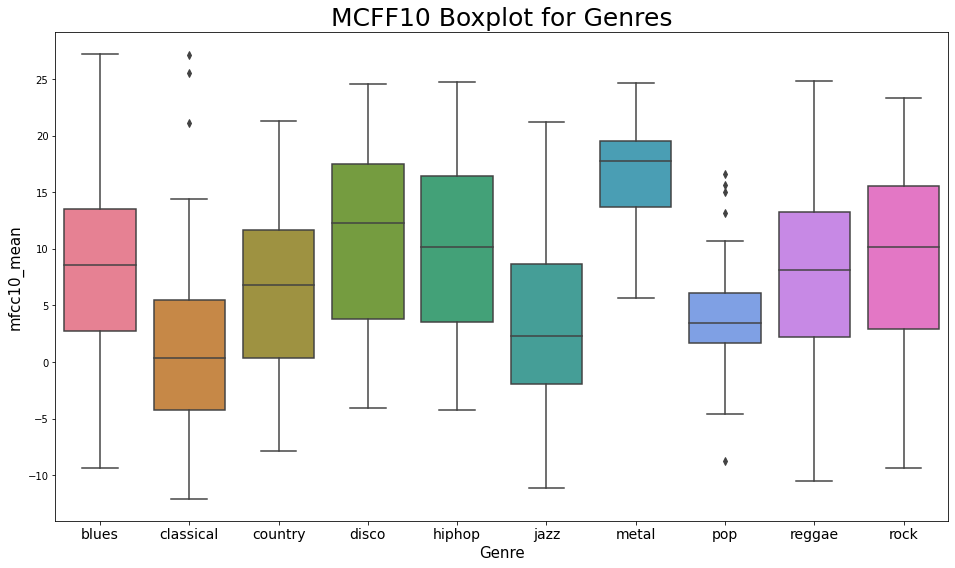

In [ ]:
x = music30[["label", "mfcc10_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc10_mean", data = x, palette = 'husl');

plt.title('MCFF10 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc10_mean", fontsize = 15)
plt.savefig("MCFF10 Boxplot.jpg")

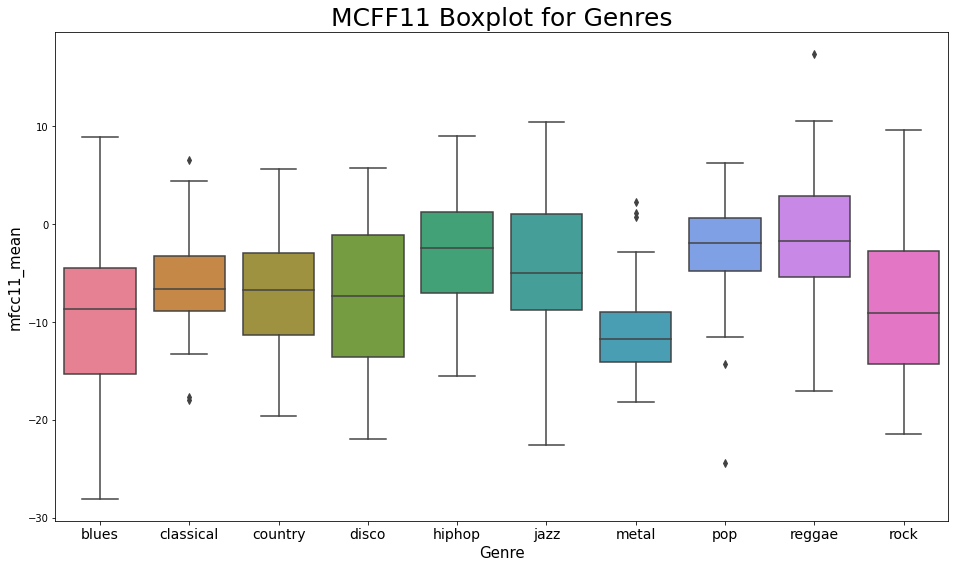

In [ ]:
x = music30[["label", "mfcc11_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc11_mean", data = x, palette = 'husl');

plt.title('MCFF11 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc11_mean", fontsize = 15)
plt.savefig("MCFF11 Boxplot.jpg")

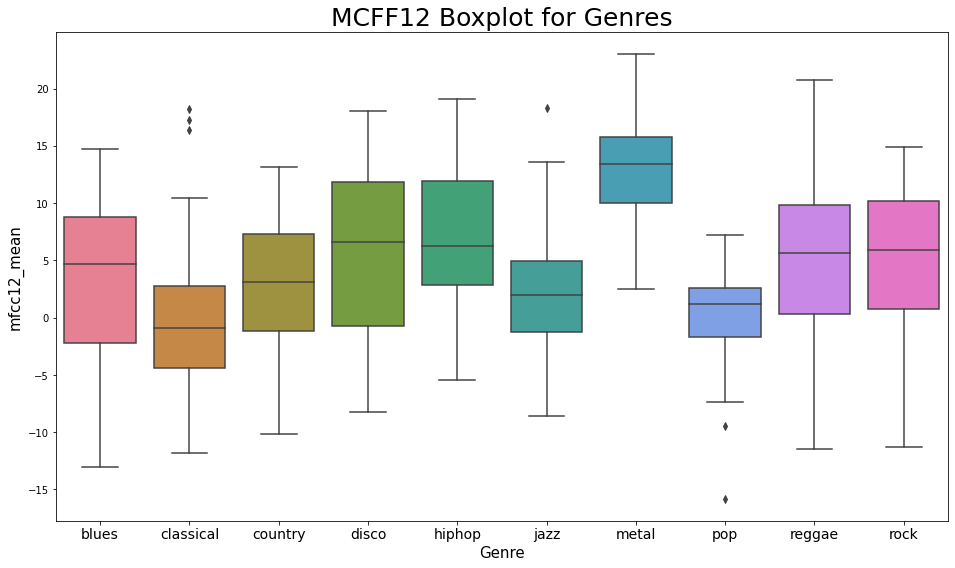

In [ ]:
x = music30[["label", "mfcc12_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc12_mean", data = x, palette = 'husl');

plt.title('MCFF12 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc12_mean", fontsize = 15)
plt.savefig("MCFF12 Boxplot.jpg")

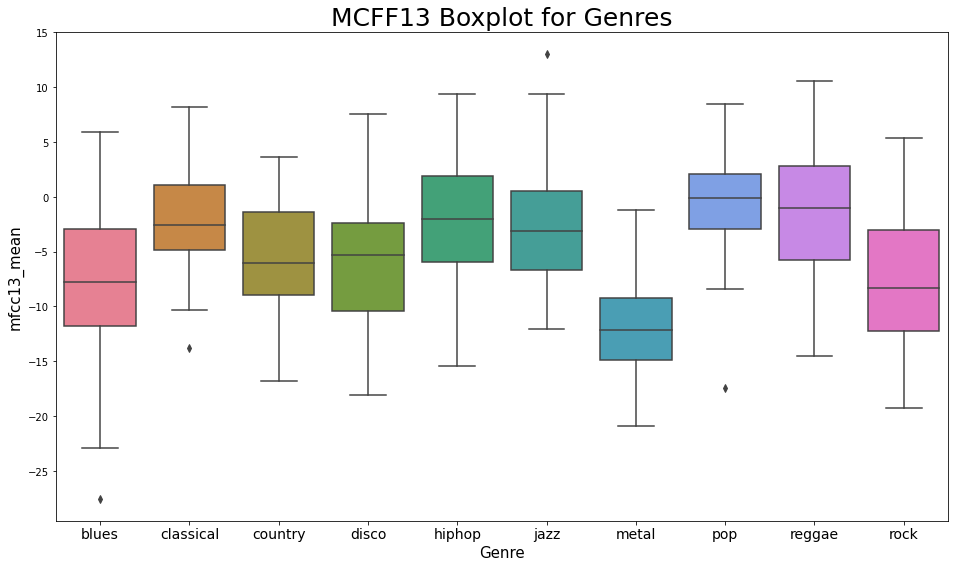

In [ ]:
x = music30[["label", "mfcc13_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc13_mean", data = x, palette = 'husl');

plt.title('MCFF13 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc13_mean", fontsize = 15)
plt.savefig("MCFF13 Boxplot.jpg")

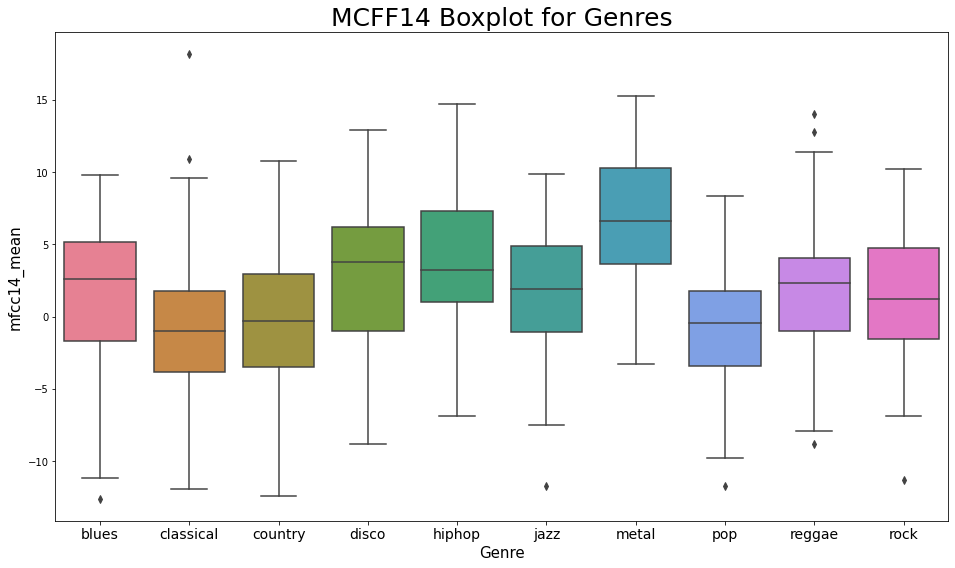

In [ ]:
x = music30[["label", "mfcc14_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc14_mean", data = x, palette = 'husl');

plt.title('MCFF14 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc14_mean", fontsize = 15)
plt.savefig("MCFF14 Boxplot.jpg")

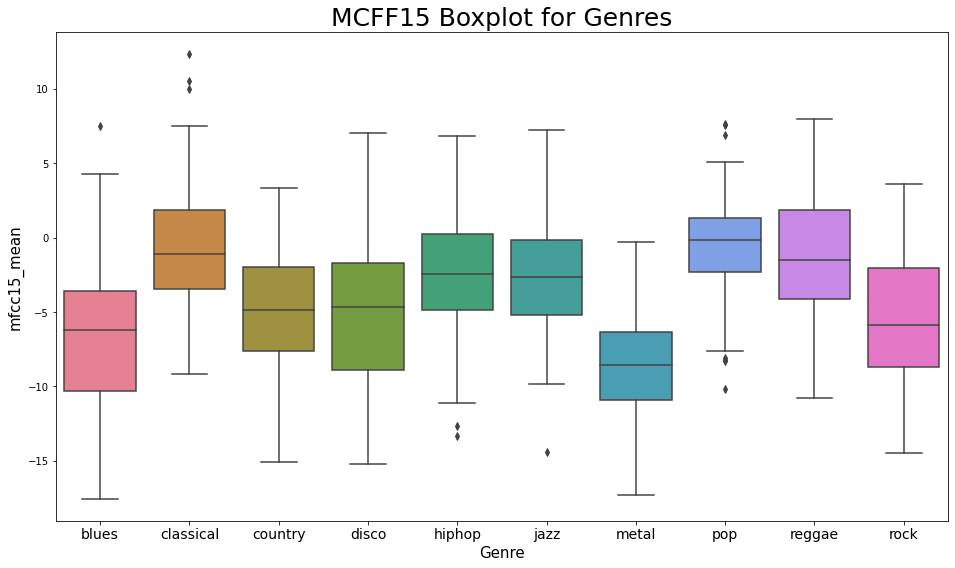

In [ ]:
x = music30[["label", "mfcc15_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc15_mean", data = x, palette = 'husl');

plt.title('MCFF15 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc15_mean", fontsize = 15)
plt.savefig("MCFF15 Boxplot.jpg")

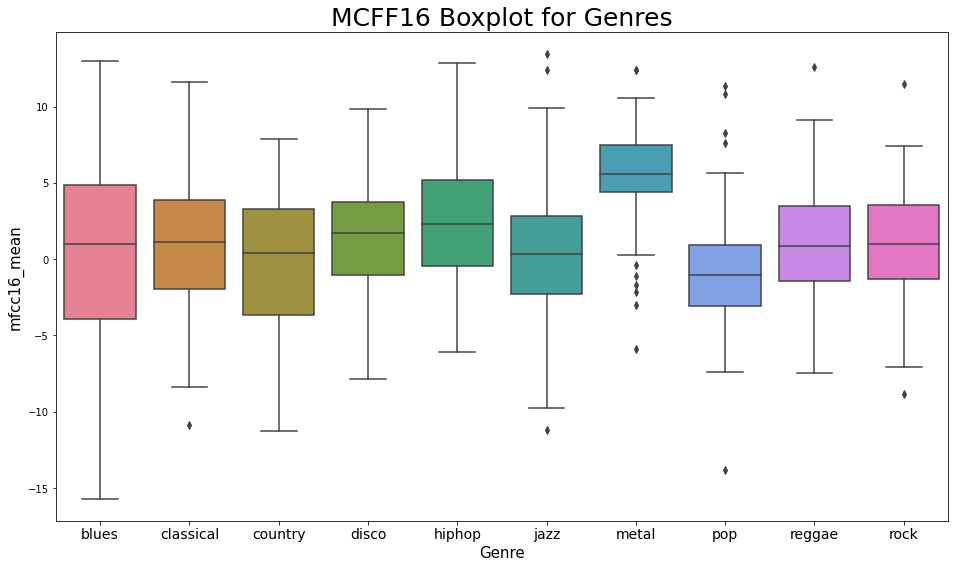

In [ ]:
x = music30[["label", "mfcc16_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc16_mean", data = x, palette = 'husl');

plt.title('MCFF16 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc16_mean", fontsize = 15)
plt.savefig("MCFF16 Boxplot.jpg")

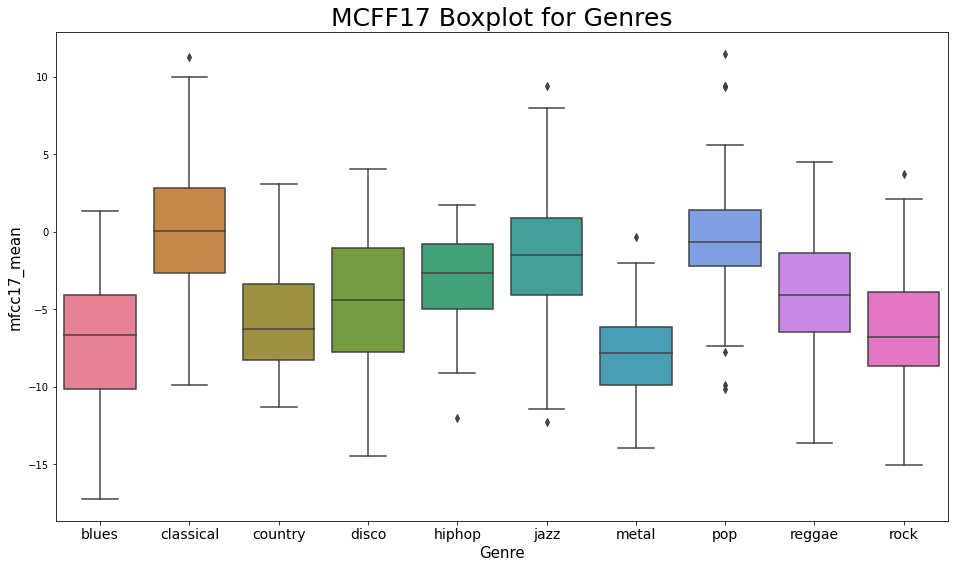

In [ ]:
x = music30[["label", "mfcc17_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc17_mean", data = x, palette = 'husl');

plt.title('MCFF17 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc17_mean", fontsize = 15)
plt.savefig("MCFF17 Boxplot.jpg")

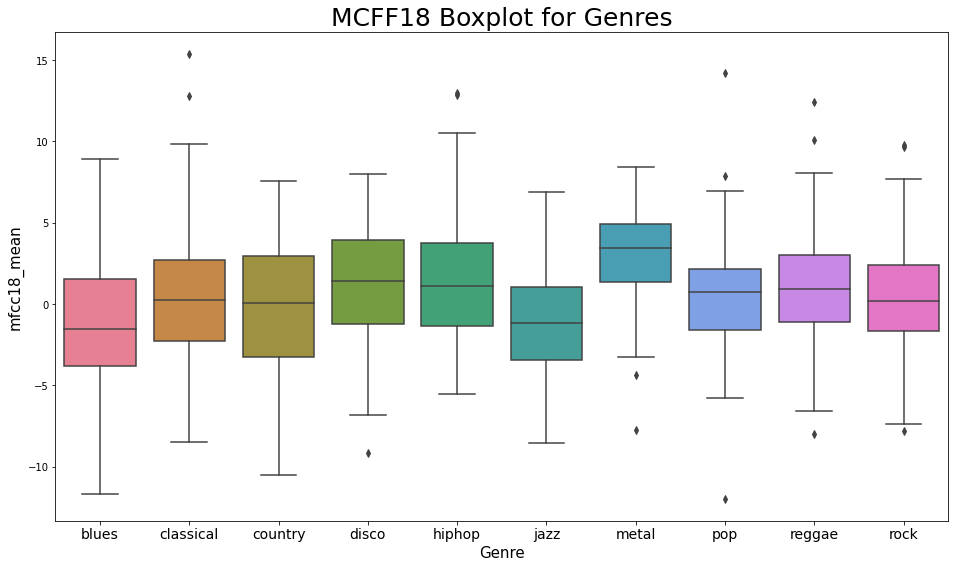

In [ ]:
x = music30[["label", "mfcc18_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc18_mean", data = x, palette = 'husl');

plt.title('MCFF18 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc18_mean", fontsize = 15)
plt.savefig("MCFF18 Boxplot.jpg")

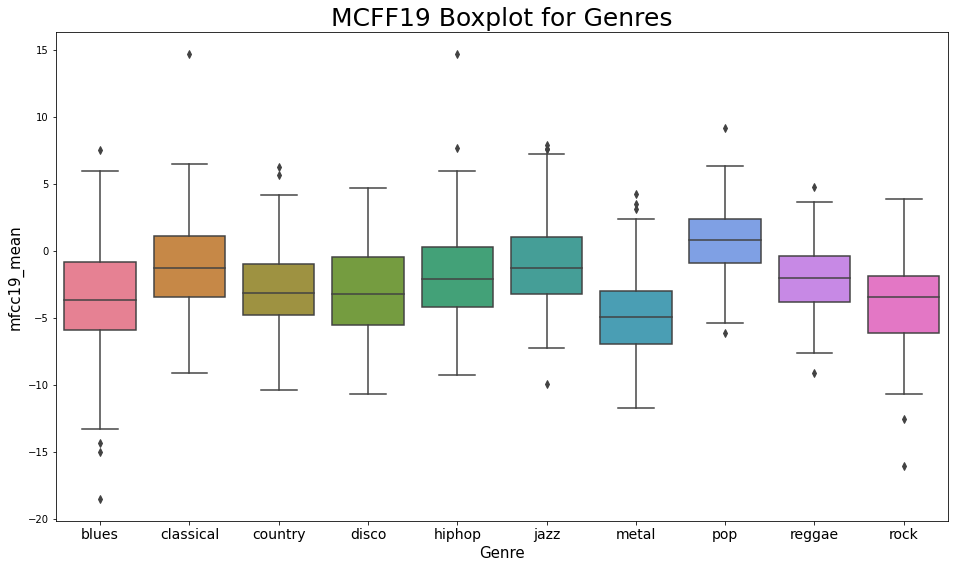

In [ ]:
x = music30[["label", "mfcc19_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc19_mean", data = x, palette = 'husl');

plt.title('MCFF19 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc19_mean", fontsize = 15)
plt.savefig("MCFF19 Boxplot.jpg")

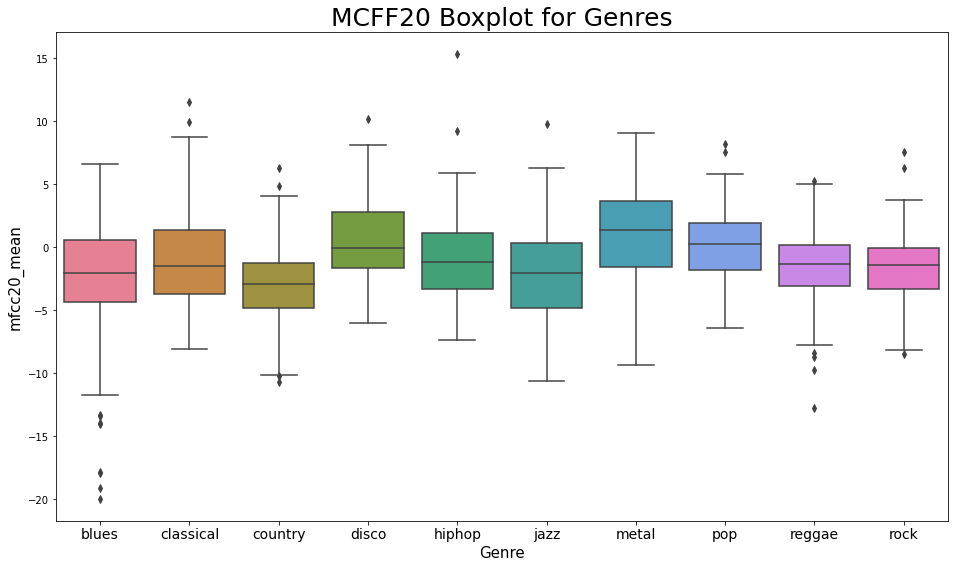

In [ ]:
x = music30[["label", "mfcc20_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "mfcc20_mean", data = x, palette = 'husl');

plt.title('MCFF20 Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("mfcc20_mean", fontsize = 15)
plt.savefig("MCFF20 Boxplot.jpg")